# Step 1: Importing the dataset





In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanishkaachaturvedi","key":"28a5616dcdfb6873d722345fcfd2e102"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:24<00:00, 141MB/s]
100% 2.70G/2.70G [00:24<00:00, 120MB/s]


In [ ]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [ ]:
import zipfile
path='data/plant'
with zipfile.ZipFile('new-plant-diseases-dataset.zip','r') as z:
  z.extractall(path)

In [ ]:
!ls "/content/data"

plant


In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [ ]:
import os
import shutil

# Define the root directory of your dataset
dataset_root = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

# Define a list of directories (classes) to be removed
directories_to_remove = ['Blueberry___healthy',
                         'Orange___Haunglongbing_(Citrus_greening)',
                         'Peach___Bacterial_spot',
                         'Peach___healthy',
                         'Pepper,_bell___Bacterial_spot',
                         'Pepper,_bell___healthy',
                         'Soybean___healthy',
                         'Squash___Powdery_mildew',
                         'Raspberry___healthy',
                         'Strawberry___healthy',
                         'Strawberry___Leaf_scorch']

# Iterate through the directories and remove them from the 'train' dataset
for directory in directories_to_remove:
    directory_path = os.path.join(dataset_root, 'train', directory)
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)  # Remove the directory and its contents

# Confirm the removal by checking the contents of the 'train' directory
train_directory_contents = os.listdir(os.path.join(dataset_root, 'train'))
print("Remaining directories in the 'train' set:")
print(train_directory_contents)


Remaining directories in the 'train' set:
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Grape___Black_rot', 'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Apple___Black_rot', 'Tomato___Target_Spot', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___healthy', 'Corn_(maize)___Common_rust_', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Cherry_(including_sour)___healthy', 'Grape___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___Esca_(Black_Measles)', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Apple___Apple_scab', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Early_blight', 'Potato___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Late_blight', 'Apple___healthy']


In [ ]:
import os
import shutil

# Define the root directory of your dataset
dataset_root = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

# Define a list of directories (classes) to be removed
directories_to_remove = ['Blueberry___healthy',
                         'Orange___Haunglongbing_(Citrus_greening)',
                         'Peach___Bacterial_spot',
                         'Peach___healthy',
                         'Pepper,_bell___Bacterial_spot',
                         'Pepper,_bell___healthy',
                         'Soybean___healthy',
                         'Squash___Powdery_mildew',
                         'Raspberry___healthy',
                         'Strawberry___healthy',
                         'Strawberry___Leaf_scorch']

# Iterate through the directories and remove them from the 'train' dataset
for directory in directories_to_remove:
    directory_path = os.path.join(dataset_root, 'valid', directory)
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)  # Remove the directory and its contents

# Confirm the removal by checking the contents of the 'train' directory
train_directory_contents = os.listdir(os.path.join(dataset_root, 'valid'))
print("Remaining directories in the 'valid' set:")
print(train_directory_contents)


Remaining directories in the 'valid' set:
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Grape___Black_rot', 'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Apple___Black_rot', 'Tomato___Target_Spot', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___healthy', 'Corn_(maize)___Common_rust_', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Cherry_(including_sour)___healthy', 'Grape___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___Esca_(Black_Measles)', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Apple___Apple_scab', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Early_blight', 'Potato___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Late_blight', 'Apple___healthy']


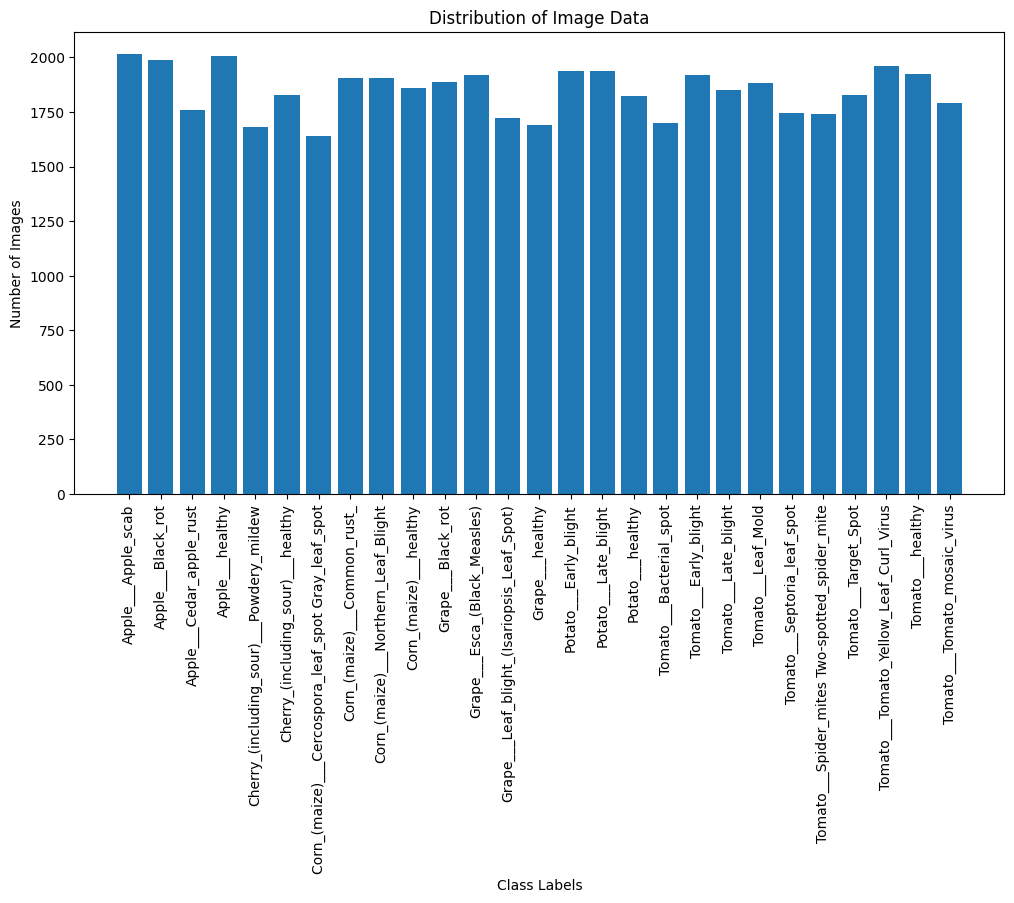

In [ ]:
import os
import matplotlib.pyplot as plt

# Assuming you have the class directory paths
class_directories = [
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___Powdery_mildew",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Early_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Late_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus"

    # Add paths for all 27 classes
]

# Get class labels from directory names
class_labels = [os.path.basename(directory) for directory in class_directories]

# Get the number of images in each class
class_counts = [len(os.listdir(directory)) for directory in class_directories]

# Create a histogram
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts)
plt.title('Distribution of Image Data')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)

plt.show()


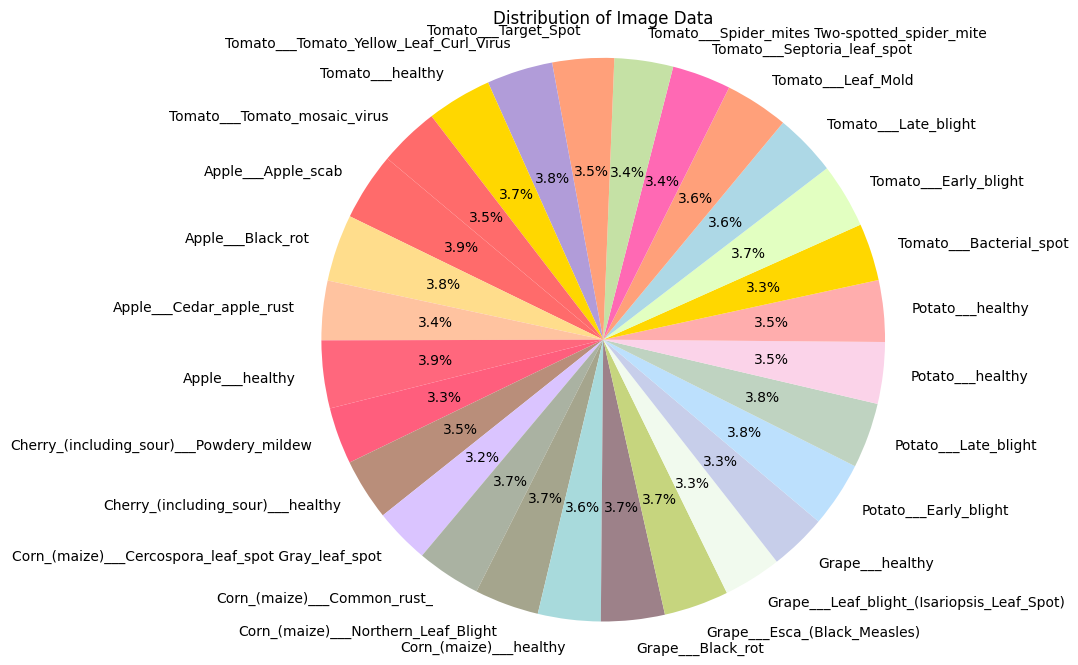

In [ ]:
import os
import matplotlib.pyplot as plt

# Assuming you have the class directory paths
class_directories = [
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___Powdery_mildew",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Early_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Late_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus"
    # Add paths for all 27 classes
]

# Get class labels from directory names
class_labels = [os.path.basename(directory) for directory in class_directories]

# Get the number of images in each class
class_counts = [len(os.listdir(directory)) for directory in class_directories]

colors = ["#FF6B6B", "#FFDD8C", "#FFC3A0", "#FF677D", "#FF5E7D", "#B98E7A", "#DAC4FF", "#AAB2A2", "#A5A58D", "#A8DADC", "#9D8189", "#C6D57E", "#F1FAEE", "#C7CEEA", "#BCE0FD", "#BFD3C1", "#FBD3E9", "#FFADAD", "#FFD700", "#E2FFC1", "#ADD8E6", "#FFA07A", "#FF69B4", "#C5E1A5", "#FFA07A", "#B19CD9", "#FFD700"
]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Image Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
pip install prettytable


In [ ]:
from prettytable import PrettyTable

class_list = [
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Grape___Black_rot',
    'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Apple___Black_rot', 'Tomato___Target_Spot',
    'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___healthy',
    'Corn_(maize)___Common_rust_', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus',
    'Cherry_(including_sour)___healthy', 'Grape___healthy', 'Cherry_(including_sour)___Powdery_mildew',
    'Grape___Esca_(Black_Measles)', 'Tomato___Spider_mites Two-spotted spider mite',
    'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Apple___Apple_scab',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Early_blight', 'Potato___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Late_blight', 'Apple___healthy'
]

# Create a table
table = PrettyTable()
table.field_names = ["Class Name", "Number of Images"]

# Create a dictionary to store class counts
class_counts = {}

# Count the occurrences of each class
for class_name in class_list:
    if class_name in class_counts:
        class_counts[class_name] += 1
    else:
        class_counts[class_name] = 1

# Add the data to the table
for class_name, count in class_counts.items():
    table.add_row([class_name, count])

# Print the table
print(table)


+----------------------------------------------------+------------------+
|                     Class Name                     | Number of Images |
+----------------------------------------------------+------------------+
|       Tomato___Tomato_Yellow_Leaf_Curl_Virus       |        1         |
|            Tomato___Septoria_leaf_spot             |        1         |
|                 Grape___Black_rot                  |        1         |
|               Tomato___Early_blight                |        1         |
|                 Tomato___Leaf_Mold                 |        1         |
|                 Apple___Black_rot                  |        1         |
|                Tomato___Target_Spot                |        1         |
|               Corn_(maize)___healthy               |        1         |
|        Corn_(maize)___Northern_Leaf_Blight         |        1         |
|                  Tomato___healthy                  |        1         |
|            Corn_(maize)___Common_rus

In [ ]:
import os
from prettytable import PrettyTable

# Define the directory where the images are located
image_directory = "/content/data/plant/test/test"

# Count the number of image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
num_images = len(image_files)

# Create a table
table = PrettyTable()
table.field_names = ["Image Name", "Number of Images"]

# Add the data to the table
for image_name in image_files:
    table.add_row([image_name, 1])

# Print the table
print(table)


+----------------------------+------------------+
|         Image Name         | Number of Images |
+----------------------------+------------------+
|       AppleScab3.JPG       |        1         |
|     TomatoHealthy1.JPG     |        1         |
|   PotatoEarlyBlight5.JPG   |        1         |
|   TomatoEarlyBlight1.JPG   |        1         |
|    CornCommonRust3.JPG     |        1         |
| TomatoYellowCurlVirus3.JPG |        1         |
|    CornCommonRust1.JPG     |        1         |
|   TomatoEarlyBlight6.JPG   |        1         |
|    AppleCedarRust1.JPG     |        1         |
| TomatoYellowCurlVirus4.JPG |        1         |
|     TomatoHealthy2.JPG     |        1         |
|       AppleScab1.JPG       |        1         |
| TomatoYellowCurlVirus6.JPG |        1         |
|   PotatoEarlyBlight3.JPG   |        1         |
| TomatoYellowCurlVirus5.JPG |        1         |
|   TomatoEarlyBlight5.JPG   |        1         |
|   TomatoEarlyBlight2.JPG   |        1         |


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_gen = image_dataset_from_directory(directory="/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(224, 224))
test_gen = image_dataset_from_directory(directory="/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(224, 224))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 49865 files belonging to 27 classes.
Found 12465 files belonging to 27 classes.


In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
traindir = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
validdir = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
testdir = "/content/data/plant/New Plant Diseases Dataset(Augmented)/test/test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 49865 images belonging to 27 classes.
Found 12465 images belonging to 27 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Potato___Early_blight': 14, 'Potato___Late_blight': 15, 'Potato___healthy': 16, 'Tomato___Bacterial_spot': 17, 'Tomato___Early_blight': 18, 'Tomato___Late_blight': 19, 'Tomato___Leaf_Mold': 20, 'Tomato___Septoria_leaf_spot': 21, 'Tomato___Spider_mites Two-spotted_spider_mite': 22, 'Tomato___Target_Spot': 23, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 24, 'Tomato___Tomato_mosaic_virus': 25, 'Tomato___healthy': 26}


In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
# Assuming you have 27 classes
num_classes = 27

# Create a Sequential model
model = Sequential()

# Add your input layer and any other layers
model.add(Dense(128, activation='relu', input_shape=(224,)))
model.add(Dropout(0.5))  # Add dropout layer with a 50% dropout rate

# Add more layers as needed
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Another dropout layer

# Adjust the output layer to have num_classes units
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Model Preparation

In [ ]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(27,activation='softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 27)                677403    
                                                                 
Total params: 15392091 (58.72 MB)
Trainable params: 677403 (2.58 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit your model with early stopping
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=5,
                         validation_steps=valid_num//batch_size,
                         callbacks=[early_stopping])


Epoch 1/5
389/389 [==============================] - 799s 2s/step - loss: 0.7329 - accuracy: 0.7758 - val_loss: 0.3492 - val_accuracy: 0.8807
Epoch 2/5
389/389 [==============================] - 750s 2s/step - loss: 0.3822 - accuracy: 0.8750 - val_loss: 0.3291 - val_accuracy: 0.8904
Epoch 3/5
389/389 [==============================] - 752s 2s/step - loss: 0.3208 - accuracy: 0.8938 - val_loss: 0.2731 - val_accuracy: 0.9111
Epoch 4/5
389/389 [==============================] - 775s 2s/step - loss: 0.2886 - accuracy: 0.9032 - val_loss: 0.3425 - val_accuracy: 0.8924
Epoch 5/5
389/389 [==============================] - 751s 2s/step - loss: 0.2680 - accuracy: 0.9097 - val_loss: 0.2352 - val_accuracy: 0.9262


In [ ]:
#fitting images to CNN/ fine-tuning/training the model

history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=3,
                         validation_steps=valid_num//batch_size,
                         )
#saving model
#filepath="Mymodel.hdf5"
#model.save(filepath)

Epoch 1/3
389/389 [==============================] - 749s 2s/step - loss: 0.2638 - accuracy: 0.9121 - val_loss: 0.2844 - val_accuracy: 0.9144
Epoch 2/3
389/389 [==============================] - 778s 2s/step - loss: 0.2509 - accuracy: 0.9158 - val_loss: 0.2346 - val_accuracy: 0.9266
Epoch 3/3
389/389 [==============================] - 749s 2s/step - loss: 0.2496 - accuracy: 0.9172 - val_loss: 0.2707 - val_accuracy: 0.9178


In [ ]:
filepath="Mymodel.h5"
classifier.save(filepath)

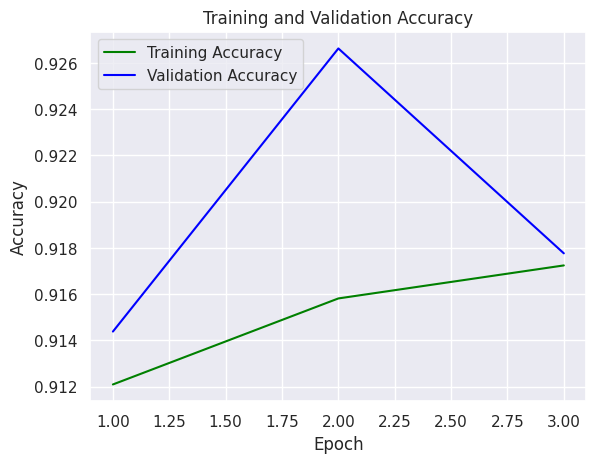

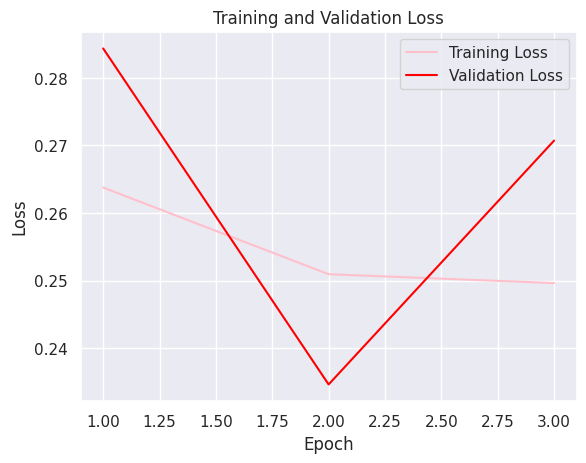

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:
1/1 [==============================] - 1s 676ms/step


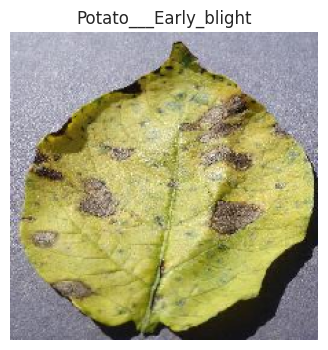

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/data/plant/test/test/PotatoEarlyBlight4.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:
1/1 [==============================] - 0s 20ms/step


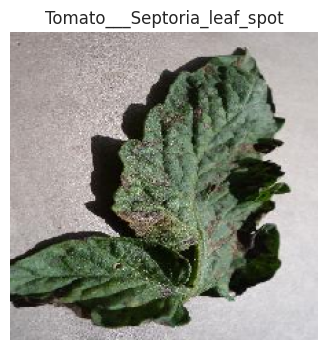

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/data/plant/test/test/TomatoEarlyBlight5.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:
1/1 [==============================] - 0s 17ms/step


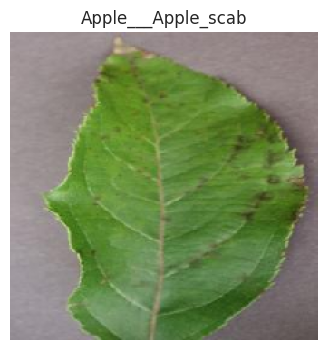

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/data/plant/test/test/AppleScab1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [ ]:
# Make predictions on the validation set
predictions = classifier.predict(valid_set)


98/98 [==============================] - 60s 618ms/step


In [ ]:
from sklearn.metrics import accuracy_score

true_labels = valid_set.classes
predicted_labels = predictions.argmax(axis=1)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy}')


Accuracy: 0.03722422783794625


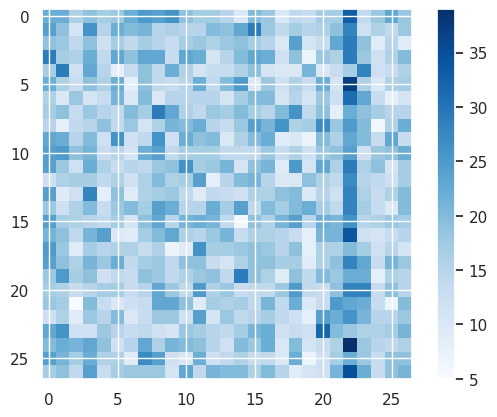

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion = confusion_matrix(true_labels, predicted_labels)
plt.imshow(confusion, cmap='Blues')
plt.colorbar()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

class_names = list(valid_set.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.04      0.04      0.04       504
                                 Apple___Black_rot       0.04      0.04      0.04       497
                          Apple___Cedar_apple_rust       0.04      0.03      0.03       440
                                   Apple___healthy       0.04      0.04      0.04       502
          Cherry_(including_sour)___Powdery_mildew       0.04      0.04      0.04       421
                 Cherry_(including_sour)___healthy       0.05      0.05      0.05       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.03      0.02      0.03       410
                       Corn_(maize)___Common_rust_       0.04      0.04      0.04       477
               Corn_(maize)___Northern_Leaf_Blight       0.03      0.03      0.03       477
                            Corn_(maize)___healthy       0.03      0.03      0.